<a href="https://colab.research.google.com/github/JoaoNeto2023/Artificial-intelligence-Adyla/blob/main/Aprendizado_de_M%C3%A1quinaS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import joblib
from sklearn.datasets import load_digits

In [ ]:
from google.colab import drive # importa o drive para pegar o arquivo csv não tratado que está lá
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/data/fitness_class_2212.csv') # pega o arquivo no local do drive
# Caso não esteja funcionando baixe o arquivo no link abaixo e coloque ele.
# Link da base de dados: https://www.kaggle.com/datasets/ddosad/datacamps-data-science-associate-certification?resource=download

In [ ]:
import pandas as pd
import os

def limpar_e_salvar_dados(nome_arquivo_entrada, nome_arquivo_saida):
    # Carregar os dados
    data = pd.read_csv(nome_arquivo_entrada)
    # Limpar os dados
    del data['booking_id']  # Remoção da coluna de ID
    media_coluna = data['weight'].median()  # Cálculo da mediana da coluna
    data['weight'].fillna(media_coluna, inplace=True)  # Preenchimento dos valores faltantes com a mediana
    data['days_before'] = data['days_before'].apply(padronizar_dias)  # Aplicação da função padronizar_dias
    data['day_of_week'] = data['day_of_week'].apply(padronizar_dia_da_semana)  # Aplicação da função padronizar_dia_da_semana
    data['category'] = data['category'].replace('-', 'Others')  # Substituição dos valores '-' por 'Others'

    # Salvar os dados limpos
    pasta = ''  # Local onde o arquivo será salvo
    data.to_csv(os.path.join(pasta, nome_arquivo_saida), index=False)  # Criação do arquivo CSV


def padronizar_dias(valor):
    if isinstance(valor, str) and "days" in valor:  # Verifica se a string contém a palavra 'days'
        return int(valor.split()[0])  # Retorna apenas o número e converte para inteiro
    else:
        return int(valor)  # Converte o valor para inteiro

def padronizar_dia_da_semana(dia):
    if len(dia) > 3:  # Verifica se a string tem mais de 3 caracteres
        return dia[:3]  # Mantém apenas os 3 primeiros caracteres
    else:
        return dia

# Chamar a função para limpar e salvar os dados
limpar_e_salvar_dados('/content/drive/MyDrive/data/fitness_class_2212.csv', 'data_limpo.csv')

In [ ]:
import pandas as pd

# Carregar o DataFrame original
data_limpo = pd.read_csv('/content/data_limpo.csv')

# Mapeamento entre dias da semana e números
dia_numero_mapping = {
    'Sun': 1,
    'Mon': 2,
    'Tue': 3,
    'Wed': 4,
    'Thu': 5,
    'Fri': 6,
    'Sat': 7
}

# Aplicar o mapeamento à coluna 'day_of_week'
if 'day_of_week' in data_limpo.columns:
    data_limpo['day_of_week'] = data_limpo['day_of_week'].map(dia_numero_mapping).fillna(data_limpo['day_of_week'])
else:
    data_limpo['day_of_week'] = data_limpo['day_of_week'].map(dia_numero_mapping)

# Mapeamento entre 'PM' e 'AM' e números
time_numero_mapping = {
    'PM': 0,
    'AM': 1
}

# Aplicar o mapeamento à coluna 'time'
if 'time' in data_limpo.columns:
    data_limpo['time'] = data_limpo['time'].map(time_numero_mapping).fillna(data_limpo['time'])
else:
    data_limpo['time'] = data_limpo['time'].map(time_numero_mapping)

# Mapeamento entre categorias e números
categoria_numero_mapping = {
    'Strength': 1,
    'HIIT': 2,
    'Cycling': 3,
    'Yoga': 4,
    'Others': 5,
    'Aqua': 6
}

# Aplicar o mapeamento à coluna 'category'
if 'category' in data_limpo.columns:
    data_limpo['category'] = data_limpo['category'].map(categoria_numero_mapping).fillna(data_limpo['category'])
else:
    data_limpo['category'] = data_limpo['category'].map(categoria_numero_mapping)

# Criar um novo DataFrame chamado 'data_IA_tratado'
data_IA_tratado = data_limpo.copy()

# Salvar o novo DataFrame em um arquivo CSV chamado 'data_IA_tratado.csv'
data_IA_tratado.to_csv('/content/data_IA_tratado.csv', index=False)


In [ ]:
data_IA_tratado = pd.read_csv('/content/data_IA_tratado.csv')
X = data_IA_tratado.drop('attended', axis=1)
y = data_IA_tratado['attended']

mlp_accuracies = []
tree_accuracies = []
knn_accuracies = []
logistic_accuracies = []
nb_accuracies = []

for _ in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # scaler = StandardScaler()
    # X_train = scaler.fit_transform(X_train)
    # X_test = scaler.transform(X_test)

    tree = DecisionTreeClassifier()
    tree.fit(X_train, y_train)
    tree_accuracies.append(tree.score(X_test, y_test))

    nb = GaussianNB()
    nb.fit(X_train, y_train)
    nb_accuracies.append(nb.score(X_test, y_test))

    mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=100, batch_size=10)
    mlp.fit(X_train, y_train)
    mlp_accuracies.append(mlp.score(X_test, y_test))

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    knn_accuracies.append(knn.score(X_test, y_test))

    logistic = LogisticRegression()
    logistic.fit(X_train, y_train)
    logistic_accuracies.append(logistic.score(X_test, y_test))

# Exibir resultados
print(f"\n Acurácias ao longo das iterações:")
print(f"Rede Neural: {np.mean(mlp_accuracies):.2f}")
print(f"Árvore de Decisão: {np.mean(tree_accuracies):.2f}")
print(f"K-NN: {np.mean(knn_accuracies):.2f}")
print(f"Regressão Logística: {np.mean(logistic_accuracies):.2f}")
print(f"Naive Bayes: {np.mean(nb_accuracies):.2f}")


 Acurácias ao longo das iterações:
Rede Neural: 0.77
Árvore de Decisão: 0.68
K-NN: 0.73
Regressão Logística: 0.77
Naive Bayes: 0.76


 Acurácias ao longo das iterações:



 obs: média de 30x, uso de 20% de base de dados para treinamento.

1. Rede Neural: 0.77
2. Árvore de Decisão: 0.68
3. K-NN: 0.74
4. Regressão Logística: 0.77
5. Naive Bayes: 0.76
--------------------------------------------------------------------


 obs: média de 30x, uso de 50% de base de dados para treinamento.

1. Rede Neural: 0.77
2. Árvore de Decisão: 0.69
3. K-NN: 0.74
4. Regressão Logística: 0.76
5. Naive Bayes: 0.77

Resultados para Rede Neural:
              precision    recall  f1-score   support

           0       0.73      0.99      0.84       197
           1       0.97      0.28      0.44       103

    accuracy                           0.75       300
   macro avg       0.85      0.64      0.64       300
weighted avg       0.81      0.75      0.70       300



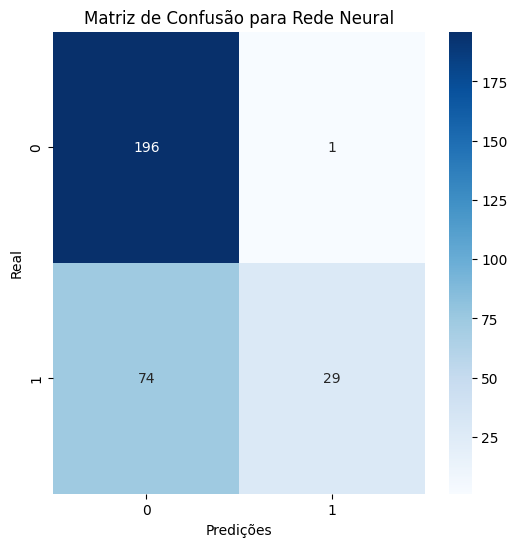

Resultados para Árvore de Decisão:
              precision    recall  f1-score   support

           0       0.75      0.78      0.77       197
           1       0.55      0.51      0.53       103

    accuracy                           0.69       300
   macro avg       0.65      0.65      0.65       300
weighted avg       0.68      0.69      0.68       300



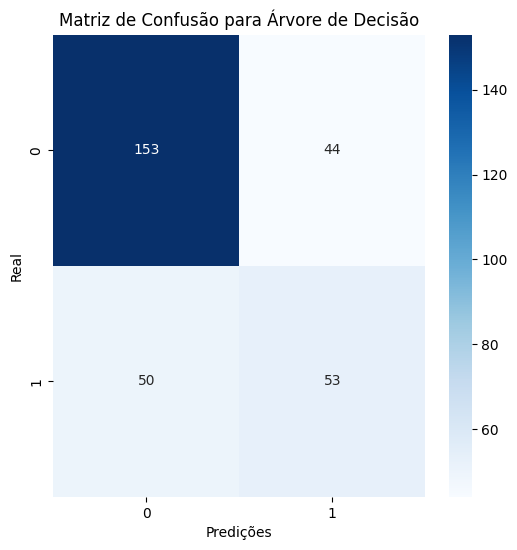

Resultados para K-NN:
              precision    recall  f1-score   support

           0       0.75      0.87      0.81       197
           1       0.65      0.46      0.54       103

    accuracy                           0.73       300
   macro avg       0.70      0.66      0.67       300
weighted avg       0.72      0.73      0.72       300



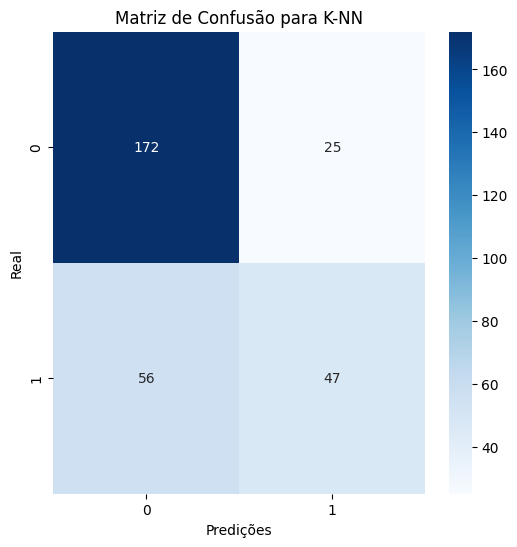

Resultados para Regressão Logística:
              precision    recall  f1-score   support

           0       0.76      0.95      0.85       197
           1       0.82      0.44      0.57       103

    accuracy                           0.77       300
   macro avg       0.79      0.69      0.71       300
weighted avg       0.78      0.77      0.75       300



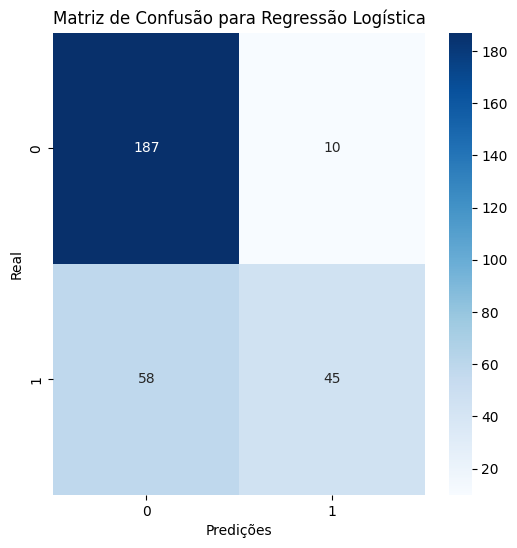

Resultados para Naive Bayes:
              precision    recall  f1-score   support

           0       0.75      0.95      0.84       197
           1       0.81      0.41      0.54       103

    accuracy                           0.76       300
   macro avg       0.78      0.68      0.69       300
weighted avg       0.77      0.76      0.74       300



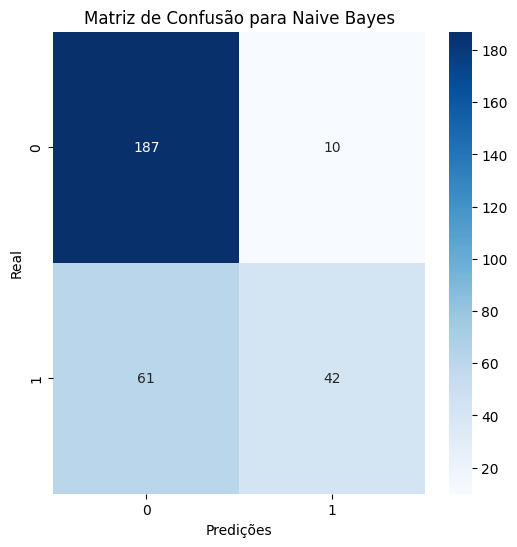

In [ ]:
classifiers = [mlp, tree, knn, logistic, nb]
classifier_names = ["Rede Neural", "Árvore de Decisão", "K-NN", "Regressão Logística", "Naive Bayes"]

for clf, clf_name in zip(classifiers, classifier_names):
    y_pred = clf.predict(X_test)
    print(f"Resultados para {clf_name}:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",)
    plt.xlabel('Predições')
    plt.ylabel('Real')
    plt.title(f"Matriz de Confusão para {clf_name}")
    plt.show()

- Acuracia: Se trada de Todos os Erros
- Precisão: Se trata de Acertos Positivos
- Recall: Se trata da Relção dos Acertos ou seja a Diferença dos Dados Anteriores

**Árvore de Decisão:**

- Acuracia:ﾠﾠﾠﾠ0.75%
- Precisão 0:ﾠﾠ 0.73%
- Precisão 1:ﾠﾠ 0.97%
- Recall 0:ﾠﾠﾠﾠﾠ0.99%
- Recall 1:ﾠﾠﾠﾠﾠ0.28%

**K-NN:**

- Acuracia:ﾠﾠﾠﾠ0.69%
- Precisão 0:ﾠﾠ 0.75%
- Precisão 1:ﾠﾠ 0.55%
- Recall 0:ﾠﾠﾠﾠ  0.78%
- Recall 1:ﾠﾠﾠﾠ  0.51%

**Regressão Logística:**

- Acuracia:ﾠﾠﾠﾠ 0.77%
- Precisão 0:ﾠﾠﾠ0.76%
- Precisão 1:ﾠﾠﾠ0.82%
- Recall 0:ﾠﾠﾠﾠ   0.95%
- Recall 1:ﾠﾠﾠﾠ   0.44%

**Naive Bayes:**

- Acuracia:ﾠﾠﾠﾠ  0.76%
- Precisão 0:ﾠﾠﾠ 0.75%
- Precisão 1:ﾠﾠﾠ 0.81%
- Recall 0:ﾠﾠﾠﾠ    0.95%
- Recall 1:ﾠﾠﾠﾠ    0.41%

In [ ]:
joblib.dump(mlp, 'modelo_rede_neural.pkl')
joblib.dump(tree, 'modelo_arvore_decisao.pkl')
joblib.dump(knn, 'modelo_knn.pkl')
joblib.dump(logistic, 'modelo_regressor_logistico.pkl')
joblib.dump(nb, 'modelo_naive_bayes.pkl')

NameError: ignored

In [ ]:
import joblib

# Carregar o modelo treinado a partir do arquivo pkl usando joblib
modelo_ia = joblib.load('modelo_arvore_decisao.pkl')


In [ ]:
precisao = modelo_ia.score(X, y)
print(f'Precisão do Modelo: {precisao:.2f}')

Precisão do Modelo: 0.94


In [ ]:
previsoes = modelo_ia.predict(X)
contagem_verdadeiro_falso = previsoes == data_limpo['attended']
quantidade_true_false = contagem_verdadeiro_falso.value_counts()

print(quantidade_true_false)

True     1406
False      94
Name: attended, dtype: int64


In [ ]:
previsoes

array([0, 0, 0, ..., 0, 0, 1])

**Dados sem colunas categoricas**

1.   Rede neural - Precisão: 72% - 1074 true/426 false
2.   Arvore - Precisão: 31% 470 - true/1030 false
3.   KNN - Precisão: 72% 1076 - true/ 424 false
4.   Logistico - Precisão: 48% - 722 true/ 778 false
5.   Naive Bayes - Precisão: 75% - 1125 true/ 375 false
** **
**Dados com colunas categoricas**
1.   Rede neural - Precisão: 39% - 558 true/917 false
2.   Arvore - Precisão: 31% - 470 true/1030 false
3.   KNN - Precisão: 72% 1076 - true/ 424 false
4.   Logistico - Precisão: 48% - 720 true/ 780 false
5.   Naive Bayes - Precisão: 75% - 1125 true/ 375 false

** **

**Dados sem StandardScaler()**
1.   Rede neural - Precisão: 78% - 1174 true/326 false
2.   Arvore - Precisão: 93% - 1402 true/98 false
3.   KNN - Precisão: 81% 1212 - true/ 288 false
4.   Logistico - Precisão: 78% - 1167 true/ 333 false
5.   Naive Bayes - Precisão: 78% - 1167 true/ 333 false

In [ ]:
# Receber os dados do BD e tranformalos(Categoricos em númericos)

import pandas as pd

# Carregar o DataFrame original
data_limpo = pd.read_csv('/content/data_limpo.csv') #minha base de dados sqlite

# Mapeamento entre dias da semana e números
dia_numero_mapping = {
    'Sun': 1,
    'Mon': 2,
    'Tue': 3,
    'Wed': 4,
    'Thu': 5,
    'Fri': 6,
    'Sat': 7
}

# Aplicar o mapeamento à coluna 'day_of_week'
if 'day_of_week' in data_limpo.columns:
    data_limpo['day_of_week'] = data_limpo['day_of_week'].map(dia_numero_mapping).fillna(data_limpo['day_of_week'])
else:
    data_limpo['day_of_week'] = data_limpo['day_of_week'].map(dia_numero_mapping)

# Mapeamento entre 'PM' e 'AM' e números
time_numero_mapping = {
    'PM': 0,
    'AM': 1
}

# Aplicar o mapeamento à coluna 'time'
if 'time' in data_limpo.columns:
    data_limpo['time'] = data_limpo['time'].map(time_numero_mapping).fillna(data_limpo['time'])
else:
    data_limpo['time'] = data_limpo['time'].map(time_numero_mapping)

# Mapeamento entre categorias e números
categoria_numero_mapping = {
    'Strength': 1,
    'HIIT': 2,
    'Cycling': 3,
    'Yoga': 4,
    'Others': 5,
    'Aqua': 6
}

# Aplicar o mapeamento à coluna 'category'
if 'category' in data_limpo.columns:
    data_limpo['category'] = data_limpo['category'].map(categoria_numero_mapping).fillna(data_limpo['category'])
else:
    data_limpo['category'] = data_limpo['category'].map(categoria_numero_mapping)

# Criar um novo DataFrame chamado 'data_IA_tratado'
data_IA_tratado = data_limpo.copy()

# Salvar o novo DataFrame em um arquivo CSV chamado 'data_IA_tratado.csv'
data_IA_tratado.to_csv('/content/data_IA_tratado.csv', index=False)




# Recebe o novo datafreme e o coloca em uma variavel para jogalo na IA
data_IA_tratado = pd.read_csv('/content/data_IA_tratado.csv')
X = data_IA_tratado.drop('attended', axis=1) # remove a coluna que não sera necesaria

import joblib

# Carregar o modelo treinado a partir do arquivo pkl usando joblib
modelo_ia = joblib.load('modelo_arvore_decisao.pkl') #Pelo nome e não pelo caminho


previsoes = modelo_ia.predict(X) # coloca a coluna gerada em uma variavel

# Adicionar as previsões ao DataFrame original
data_com_a_previsao = data_limpo #minha base de dados sqlite
data_com_a_previsao['attended'] = previsoes


In [ ]:
previsoes


array([0, 0, 0, ..., 0, 0, 1])